In [64]:
from pyspark.sql import SparkSession, SQLContext, DataFrame
import pyspark.sql.functions as f
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
spark = SparkSession.builder.appName("Yelp").getOrCreate()

In [66]:
sqlContext = SQLContext(spark)

In [67]:
df = sqlContext.read.json ("C:/Users/kparab/Desktop/Data Science Project/Group Project/Data/bus.json")

In [68]:
CategoryExplo = df.select(f.explode(df.categories).alias("category"),\
                                    df.state, df.business_id, df.city, (df.attributes.RestaurantsPriceRange2).alias("PriceRange"), df.stars, df.review_count)

In [69]:
CategoryExplo.createOrReplaceTempView("BusinessCategory")



## Top 20 Business Categories in Yelp

In [70]:
result1 = spark.sql("Select category, count(business_id) as total_restaurants from BusinessCategory group by category order by count(business_id) desc limit 20")

In [71]:
result1.show()

+--------------------+-----------------+
|            category|total_restaurants|
+--------------------+-----------------+
|         Restaurants|            51613|
|            Shopping|            24595|
|                Food|            23014|
|       Beauty & Spas|            15139|
|       Home Services|            13202|
|    Health & Medical|            12033|
|           Nightlife|            11364|
|                Bars|             9868|
|          Automotive|             9476|
|      Local Services|             9343|
|Event Planning & ...|             8038|
|         Active Life|             7427|
|             Fashion|             6299|
|          Sandwiches|             5864|
|           Fast Food|             5792|
|American (Traditi...|             5737|
|               Pizza|             5652|
|        Coffee & Tea|             5565|
|         Hair Salons|             5395|
|     Hotels & Travel|             5188|
+--------------------+-----------------+



In [72]:
result1.toPandas()

,category,total_restaurants
0,Restaurants,51613
1,Shopping,24595
2,Food,23014
3,Beauty & Spas,15139
4,Home Services,13202
5,Health & Medical,12033
6,Nightlife,11364
7,Bars,9868
8,Automotive,9476
9,Local Services,9343


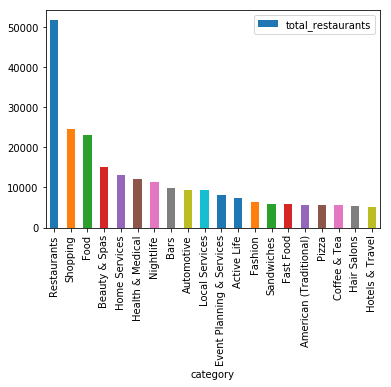

In [73]:
result1.toPandas().plot(kind='bar', x= 'category', y= 'total_restaurants')

As you can see, the top most category in Yelp is Restaurants followed by Shopping and Food

### Let's find out the count of stars for all businesses

In [74]:
result2 = spark.sql("Select stars, count(business_id) as total_restaurants from BusinessCategory group by stars order by count(business_id) desc")

In [75]:
result2.show()

+-----+-----------------+
|stars|total_restaurants|
+-----+-----------------+
|  4.0|           121358|
|  3.5|           105757|
|  5.0|            97622|
|  4.5|            89323|
|  3.0|            79055|
|  2.5|            48476|
|  2.0|            28505|
|  1.5|            11626|
|  1.0|             8568|
+-----+-----------------+



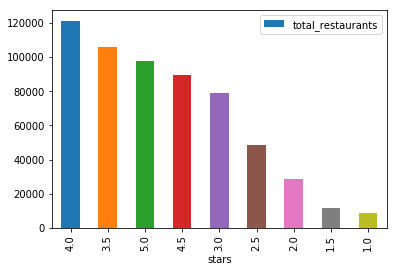

In [76]:
result2.toPandas().plot(kind='bar', x= 'stars', y= 'total_restaurants')

It shows that Yelp has an abundance of 4.0 stars businesses followed by 3.5 stars. 

## Top 10 cities having businesses on Yelp

In [77]:
result3 = spark.sql("Select city, count(business_id) as total_restaurants from BusinessCategory group by city order by total_restaurants desc LIMIT 10")

In [78]:
result3.show()

+----------+-----------------+
|      city|total_restaurants|
+----------+-----------------+
| Las Vegas|            95865|
|   Phoenix|            59510|
|   Toronto|            55715|
|Scottsdale|            30697|
| Charlotte|            29446|
|Pittsburgh|            21272|
|      Mesa|            19328|
|  Montréal|            18106|
| Henderson|            15990|
|     Tempe|            15343|
+----------+-----------------+



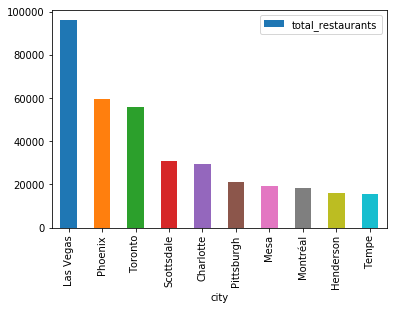

In [79]:
result3.toPandas().plot(kind='bar', x= 'city', y= 'total_restaurants')